In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime as dt
import seaborn as sns
sns.set(style = "whitegrid")
%matplotlib inline

In [2]:
path = "/Users/erickwalker/Documents/Data_Science/Metis/Class_Work/Class_Projects/Project1_MTA_Data"

### MTA Data Sourced from: http://web.mta.info/developers/turnstile.html

In [3]:
# Make a list of dfs with each week's data, then concatenate into one

week_nums = [191130,191123,191116,191109,191102,191026,191019,191012,191005,190928,190921,190914,190907,190831]

url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
df_list = []
for week_num in week_nums:
    file_url = url.format(week_num)
    df_list.append(pd.read_csv(file_url))

turnstiles_df = pd.concat(df_list)
turnstiles_df = turnstiles_df.reset_index(drop=True)

In [4]:
# Look at DataFrame shape
turnstiles_df.shape

(2881504, 11)

In [5]:
turnstiles_df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

In [8]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/23/2019,03:00:00,REGULAR,7283183,2468144
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/23/2019,07:00:00,REGULAR,7283192,2468156
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/23/2019,11:00:00,REGULAR,7283288,2468253
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/23/2019,15:00:00,REGULAR,7283497,2468327
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/23/2019,19:00:00,REGULAR,7283868,2468405


In [9]:
# Examine column names
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [10]:
# Make all columns upperspace and remove whitespace
turnstiles_df.columns = [column.strip().upper() for column in turnstiles_df.columns]

In [11]:
# Examine DESC column
turnstiles_df[turnstiles_df["DESC"] == "RECOVR AUD"]["DESC"].count() / turnstiles_df.shape[0]

0.004158245138649816

### Instances where DESC = RECOVR AUD (Recovery Audit) account for only 0.4% of total rows
Only wish to look at regular counts --> Remove non-regular rows (where DESC != "REGULAR")

In [12]:
turnstiles_df = turnstiles_df[turnstiles_df["DESC"] == "REGULAR"]
print(turnstiles_df["DESC"].unique())

['REGULAR']


In [13]:
# Create DATE_TIME and DAY_NAME columns
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df["DATE"] + " " + turnstiles_df["TIME"], format="%m/%d/%Y %H:%M:%S")
turnstiles_df["DAY_NAME"] = turnstiles_df["DATE_TIME"].dt.day_name()

In [14]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_NAME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/23/2019,03:00:00,REGULAR,7283183,2468144,2019-11-23 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/23/2019,07:00:00,REGULAR,7283192,2468156,2019-11-23 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/23/2019,11:00:00,REGULAR,7283288,2468253,2019-11-23 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/23/2019,15:00:00,REGULAR,7283497,2468327,2019-11-23 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/23/2019,19:00:00,REGULAR,7283868,2468405,2019-11-23 19:00:00,Saturday


In [15]:
# Remove the weekends, focusing only on work days
df_weekdays = turnstiles_df[~turnstiles_df["DAY_NAME"].isin(["Saturday", "Sunday"])]

# Ensure all weekend rows were dropped
df_weekdays["DAY_NAME"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [16]:
# Create unique identifier for each turnstile
df_weekdays['TURNSTILE'] = df_weekdays['C/A'] + df_weekdays['UNIT'] + df_weekdays['SCP']

In [19]:
# Drop duplicate entries
df_weekdays.sort_values(by=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],inplace=True)
df_weekdays.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [20]:
df_weekdays.shape

(2050042, 14)

In [22]:
df_weekdays.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_NAME,TURNSTILE
205539,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/29/2019,04:00:00,REGULAR,5554,420,2019-11-29 04:00:00,Friday,TRAM2R46900-05-01
205540,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/29/2019,08:00:00,REGULAR,5554,420,2019-11-29 08:00:00,Friday,TRAM2R46900-05-01
205541,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/29/2019,12:00:00,REGULAR,5554,420,2019-11-29 12:00:00,Friday,TRAM2R46900-05-01
205542,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/29/2019,16:00:00,REGULAR,5554,420,2019-11-29 16:00:00,Friday,TRAM2R46900-05-01
205543,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/29/2019,20:00:00,REGULAR,5554,420,2019-11-29 20:00:00,Friday,TRAM2R46900-05-01


In [23]:
# Create column of previous Entries to then calculate incremental Entries
df_weekdays[["PREV_DATE", "PREV_ENTRIES"]] = (df_weekdays
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE",
                                                                                                    "ENTRIES"]]
                                                       .apply(lambda x: x.shift(1)))

In [24]:
# Create column of previous Exits to then calculate incremental Exits
df_weekdays[["PREV_DATE", "PREV_EXITS"]] = df_weekdays.groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", 
                                                                                                   "EXITS"]]
                                                       .apply(lambda x: x.shift(1))

In [25]:
df_weekdays.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_NAME,TURNSTILE,PREV_DATE,PREV_ENTRIES,PREV_EXITS
2676253,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2019,00:00:00,REGULAR,7177742,2430784,2019-08-26 00:00:00,Monday,A002R05102-00-00,NaN,NaN,NaN
2676254,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2019,04:00:00,REGULAR,7177749,2430786,2019-08-26 04:00:00,Monday,A002R05102-00-00,08/26/2019,7177742.0,2430784.0
2676255,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2019,08:00:00,REGULAR,7177780,2430862,2019-08-26 08:00:00,Monday,A002R05102-00-00,08/26/2019,7177749.0,2430786.0
2676256,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2019,12:00:00,REGULAR,7177891,2431064,2019-08-26 12:00:00,Monday,A002R05102-00-00,08/26/2019,7177780.0,2430862.0
2676257,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2019,16:00:00,REGULAR,7178096,2431123,2019-08-26 16:00:00,Monday,A002R05102-00-00,08/26/2019,7177891.0,2431064.0
2676258,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2019,20:00:00,REGULAR,7178703,2431195,2019-08-26 20:00:00,Monday,A002R05102-00-00,08/26/2019,7178096.0,2431123.0
2676259,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/27/2019,00:00:00,REGULAR,7178840,2431219,2019-08-27 00:00:00,Tuesday,A002R05102-00-00,08/26/2019,7178703.0,2431195.0
2676260,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/27/2019,04:00:00,REGULAR,7178855,2431222,2019-08-27 04:00:00,Tuesday,A002R05102-00-00,08/27/2019,7178840.0,2431219.0
2676261,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/27/2019,08:00:00,REGULAR,7178899,2431313,2019-08-27 08:00:00,Tuesday,A002R05102-00-00,08/27/2019,7178855.0,2431222.0
2676262,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/27/2019,12:00:00,REGULAR,7179014,2431534,2019-08-27 12:00:00,Tuesday,A002R05102-00-00,08/27/2019,7178899.0,2431313.0


In [26]:
# Drop the rows for the earliest date in the df
df_weekdays.dropna(subset=["PREV_DATE"], axis=0, inplace = True)

In [27]:
# If counter is very large (in this case defined as >100,000), then the counter might have been reset.  
# Set it to zero as different counters have different cycle limits

def get_daily_counts(row, col, max_count):
    counter = row[col] - row["PREV_" + col]
    # Counter may have been reversed - convert to positive number
    if counter < 0:
        
        counter = -counter
    if counter > max_count:
        
        counter = min(row[col], row["PREV_" + col])
    # Check it again to make sure we're not still giving a counter that's too big
    if counter > max_count:
        
        return 0
    return counter

In [28]:
df_weekdays["INCREMENTAL_ENTRIES"] = df_weekdays.apply(get_daily_counts, axis=1, col="ENTRIES", max_count=100000)

In [33]:
df_weekdays["INCREMENTAL_EXITS"] = df_weekdays.apply(get_daily_counts, axis=1, col="EXITS", max_count=100000)

In [85]:
df_weekdays[["ENTRIES","PREV_ENTRIES","INCREMENTAL_ENTRIES","EXITS","PREV_EXITS","INCREMENTAL_EXITS"]].head()

,ENTRIES,PREV_ENTRIES,INCREMENTAL_ENTRIES,EXITS,PREV_EXITS,INCREMENTAL_EXITS
2676254,7177749,7177742.0,7.0,2430786,2430784.0,2.0
2676255,7177780,7177749.0,31.0,2430862,2430786.0,76.0
2676256,7177891,7177780.0,111.0,2431064,2430862.0,202.0
2676257,7178096,7177891.0,205.0,2431123,2431064.0,59.0
2676258,7178703,7178096.0,607.0,2431195,2431123.0,72.0


### Limit data to hour timestamps between 7:00 and 11:00 AM

In [35]:
df_commute_window = df_weekdays[(df_weekdays["TIME"] >= "07:00:00") & (df_weekdays["TIME"] <= "11:00:00")]

In [36]:
df_commute_window.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_NAME,TURNSTILE,PREV_DATE,PREV_ENTRIES,PREV_EXITS,INCREMENTAL_ENTRIES,INCREMENTAL_EXITS
2676255,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2019,08:00:00,REGULAR,7177780,2430862,2019-08-26 08:00:00,Monday,A002R05102-00-00,08/26/2019,7177749.0,2430786.0,31.0,76.0
2676261,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/27/2019,08:00:00,REGULAR,7178899,2431313,2019-08-27 08:00:00,Tuesday,A002R05102-00-00,08/27/2019,7178855.0,2431222.0,44.0,91.0
2676267,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/28/2019,08:00:00,REGULAR,7180017,2431830,2019-08-28 08:00:00,Wednesday,A002R05102-00-00,08/28/2019,7179983.0,2431742.0,34.0,88.0
2676279,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/30/2019,08:00:00,REGULAR,7182184,2432845,2019-08-30 08:00:00,Friday,A002R05102-00-00,08/30/2019,7182150.0,2432752.0,34.0,93.0
2471460,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/02/2019,08:00:00,REGULAR,7184683,2433570,2019-09-02 08:00:00,Monday,A002R05102-00-00,09/02/2019,7184669.0,2433541.0,14.0,29.0


In [111]:
# First get sum of Incremental Exits by station
work_week_exits = df_commute_window.groupby(["STATION"])["INCREMENTAL_EXITS"].sum().reset_index()\
                                    .sort_values(by="INCREMENTAL_EXITS",ascending=False)

work_week_exits.head(5)

,STATION,INCREMENTAL_EXITS
232,GRD CNTRL-42 ST,2293745.0
225,FULTON ST,2118592.0
314,PATH NEW WTC,1770310.0
61,34 ST-PENN STA,1525331.0
59,34 ST-HERALD SQ,1381410.0


In [112]:
stations_incremental_top10 = work_week_exits.nlargest(10, columns='INCREMENTAL_EXITS')

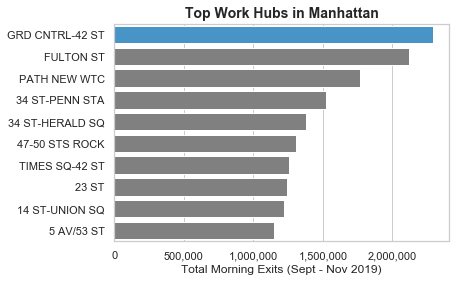

In [173]:
# Graph Manhattan Station Exits
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
exits_palette = {key: "gray" if key != "GRD CNTRL-42 ST" else "#3498db" for key in 
                 stations_incremental_top10["STATION"].unique()}
sns.barplot(stations_incremental_top10["INCREMENTAL_EXITS"],stations_incremental_top10["STATION"],
            orient = "h",palette = exits_palette)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel("Total Morning Exits (Sept - Nov 2019)")
plt.ylabel("")
plt.title("Top Work Hubs in Manhattan", weight="bold", fontsize="14")
plt.savefig(path+"/img/Manhattan_Top_Work_Hubs.png", dpi=300, bbox_inches='tight');

### Next, view subway lines that go through Grand Central
These will be used to find the stations that have the lowest amount of entries during rush hour (the idea being low entries imply an area with further development potential)

In [114]:
# Find which lines go through Grand Central 
df_commute_window[df_commute_window['STATION'] == 'GRD CNTRL-42 ST']["LINENAME"].unique()

array(['4567S'], dtype=object)

In [115]:
# Choosing 4 line to start with
df_commute_window[df_commute_window['LINENAME'].str.contains('4')].STATION.unique() 

array(['59 ST', '14 ST-UNION SQ', 'CHAMBERS ST', 'FULTON ST',
       'BOTANIC GARDEN', 'BOROUGH HALL', 'ATL AV-BARCLAY',
       '161/YANKEE STAD', 'BOWLING GREEN', 'WALL ST', 'BROOKLYN BRIDGE',
       'GRD CNTRL-42 ST', '86 ST', '125 ST', '138/GRAND CONC',
       '149/GRAND CONC', '167 ST', '170 ST', 'MT EDEN AV', '176 ST',
       'BURNSIDE AV', '183 ST', 'FORDHAM RD', 'KINGSBRIDGE RD',
       'BEDFORD PK BLVD', 'MOSHOLU PKWY', 'WOODLAWN', 'NEVINS ST',
       'FRANKLIN AV', 'CROWN HTS-UTICA'], dtype=object)

In [116]:
# Adding in 5 line since the majority of stops are identical
df_commute_window[df_commute_window['LINENAME'].str.contains('5')].STATION.unique() 

array(['59 ST', '14 ST-UNION SQ', 'CHAMBERS ST', 'FULTON ST',
       'BOTANIC GARDEN', 'BOROUGH HALL', 'ATL AV-BARCLAY',
       'BOWLING GREEN', 'WALL ST', 'BROOKLYN BRIDGE', 'GRD CNTRL-42 ST',
       '86 ST', '125 ST', '138/GRAND CONC', '149/GRAND CONC',
       '3 AV-149 ST', 'JACKSON AV', 'PROSPECT AV', 'INTERVALE AV',
       'SIMPSON ST', 'FREEMAN ST', '174 ST', 'WEST FARMS SQ', 'E 180 ST',
       'BRONX PARK EAST', 'PELHAM PKWY', 'ALLERTON AV', 'BURKE AV',
       'GUN HILL RD', '219 ST', '225 ST', '233 ST', 'NEREID AV',
       'NEVINS ST', 'FRANKLIN AV', 'PRESIDENT ST', 'STERLING ST',
       'WINTHROP ST', 'CHURCH AV', 'BEVERLY RD', 'NEWKIRK AV',
       'FLATBUSH AV-B.C', 'MORRIS PARK', 'BAYCHESTER AV',
       'EASTCHSTER/DYRE'], dtype=object)

In [117]:
# Create list of stations in Brooklyn with access to 4 & 5 lines  
stations_4_5 = ['CROWN HTS-UTICA', 'FRANKLIN AV', 'ATL AV-BARCLAY', 'NEVINS ST','BOROUGH HALL', 'PRESIDENT ST', 
                'STERLING ST','WINTHROP ST', 'CHURCH AV', 'BEVERLY RD', 'NEWKIRK AV']

In [118]:
df_4_5_Brooklyn = df_commute_window[df_commute_window['STATION'].isin(stations_4_5)] 

In [119]:
df_4_5_Brooklyn.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_NAME,TURNSTILE,PREV_DATE,PREV_ENTRIES,PREV_EXITS,INCREMENTAL_ENTRIES,INCREMENTAL_EXITS
2690571,B015,R098,01-00-00,CHURCH AV,BQ,BMT,08/26/2019,08:00:00,REGULAR,3397859,1996328,2019-08-26 08:00:00,Monday,B015R09801-00-00,08/26/2019,3397723.0,1996290.0,136.0,38.0
2690577,B015,R098,01-00-00,CHURCH AV,BQ,BMT,08/27/2019,08:00:00,REGULAR,3398621,1996776,2019-08-27 08:00:00,Tuesday,B015R09801-00-00,08/27/2019,3398418.0,1996738.0,203.0,38.0
2690583,B015,R098,01-00-00,CHURCH AV,BQ,BMT,08/28/2019,08:00:00,REGULAR,3399445,1997177,2019-08-28 08:00:00,Wednesday,B015R09801-00-00,08/28/2019,3399246.0,1997137.0,199.0,40.0
2690589,B015,R098,01-00-00,CHURCH AV,BQ,BMT,08/29/2019,08:00:00,REGULAR,3400177,1997550,2019-08-29 08:00:00,Thursday,B015R09801-00-00,08/29/2019,3400021.0,1997521.0,156.0,29.0
2690595,B015,R098,01-00-00,CHURCH AV,BQ,BMT,08/30/2019,08:00:00,REGULAR,3400760,1998007,2019-08-30 08:00:00,Friday,B015R09801-00-00,08/30/2019,3400615.0,1997958.0,145.0,49.0


In [131]:
# Get Entries by Station
bklyn_4_5_entries_by_stn = df_4_5_Brooklyn.groupby(['STATION'])['INCREMENTAL_ENTRIES'].sum().reset_index()\
.sort_values(by = 'INCREMENTAL_ENTRIES')

In [132]:
bklyn_4_5_entries_by_stn 

,STATION,INCREMENTAL_ENTRIES
8,PRESIDENT ST,80842.0
6,NEVINS ST,95511.0
9,STERLING ST,97086.0
1,BEVERLY RD,124459.0
10,WINTHROP ST,143075.0
7,NEWKIRK AV,217617.0
2,BOROUGH HALL,258077.0
5,FRANKLIN AV,382518.0
4,CROWN HTS-UTICA,657122.0
0,ATL AV-BARCLAY,690192.0


In [138]:
df_commute_window[df_commute_window["STATION"]=="NEVINS ST"]["INCREMENTAL_ENTRIES"].sum()

95511.0

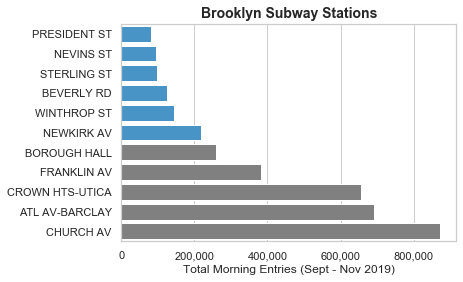

In [156]:
# Graph Stations by Entries
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

red_list = ["WINTHROP ST","NEWKIRK AV", "PRESIDENT ST", "BEVERLY RD","STERLING ST","NEVINS ST"] 
entries_palette = {key: "gray" if key not in red_list else "#3498db" for key in bklyn_4_5_entries_by_stn["STATION"].unique()}

sns.barplot(bklyn_4_5_entries_by_stn['INCREMENTAL_ENTRIES'],bklyn_4_5_entries_by_stn['STATION'], orient = "h", palette = entries_palette)
plt.xlabel("Total Morning Entries (Sept - Nov 2019)")
plt.ylabel("")
plt.title("Brooklyn Subway Stations", weight="bold", fontsize="14")
plt.savefig(path+"/img/Brooklyn_Subway_Stops.png", dpi=300, bbox_inches='tight');

In [146]:
stations_4_5

['CROWN HTS-UTICA',
 'FRANKLIN AV',
 'ATL AV-BARCLAY',
 'NEVINS ST',
 'BOROUGH HALL',
 'PRESIDENT ST',
 'STERLING ST',
 'WINTHROP ST',
 'CHURCH AV',
 'BEVERLY RD',
 'NEWKIRK AV']

### Assign median income to Brooklyn subway stations
Source: https://ny.curbed.com/2017/8/4/16099252/new-york-neighborhood-affordability

In [147]:
stations_4_5_inc = {"CROWN HTS-UTICA":37104,
                              "PRESIDENT ST":41745,
                              "BEVERLY RD":50889,
                              "CHURCH AV": 45332,
                               "NEWKIRK AV":45332,
                              "FRANKLIN AV":42462,
                               "STERLING ST": 42462,
                                "WINTHROP ST":42462,
                                "ATL AV-BARCLAY":84945,
                                "NEVINS ST":84945,
                                "BOROUGH HALL":84945
                             }

In [148]:
# Assign Brookly neighborhoods to subway stations
stations_4_5_nhoods = {"CROWN HTS-UTICA":"Crown Heights North",
                              "PRESIDENT ST":"Crown Heights South",
                              "BEVERLY RD":"East Flatbush",
                              "CHURCH AV": "Flatbush",
                               "NEWKIRK AV":"Flatbush",
                              "FRANKLIN AV": "Prospect Lefferts Gardens",
                               "STERLING ST": "Prospect Lefferts Gardens",
                                "WINTHROP ST":"Prospect Lefferts Gardens",
                                "ATL AV-BARCLAY":"Downtown Brooklyn",
                                "NEVINS ST":"Downtown Brooklyn",
                                "BOROUGH HALL":"Downtown Brooklyn"
                             }

In [149]:
# Add Neighborhood and Income data to dataframe
bklyn_4_5_entries_by_stn["N_HOOD"] = bklyn_4_5_entries_by_stn ['STATION'].map(stations_4_5_nhoods)
bklyn_4_5_entries_by_stn["INCOME"] = bklyn_4_5_entries_by_stn ['STATION'].map(stations_4_5_inc)                                             

In [152]:
# Create DataFrame grouped by Neighborhood
df_norm_n_hood = pd.DataFrame(bklyn_4_5_entries_by_stn.groupby("N_HOOD")[["INCREMENTAL_ENTRIES", "INCOME"]]
                                    .agg({"INCREMENTAL_ENTRIES": "sum",
                                          "INCOME": "mean",
                                         })
                              )

# Scale data between 0-1
df_norm_n_hood["INCOME"] = (df_norm_n_hood["INCOME"] - df_norm_n_hood["INCOME"].min()) / (df_norm_n_hood["INCOME"].max() - df_norm_n_hood["INCOME"].min())
df_norm_n_hood["ENTRIES"] = (df_norm_n_hood["INCREMENTAL_ENTRIES"] - df_norm_n_hood["INCREMENTAL_ENTRIES"].min()) / (df_norm_n_hood["INCREMENTAL_ENTRIES"].max() - df_norm_n_hood["INCREMENTAL_ENTRIES"].min())


In [153]:
# Drop INCREMENTAL_ENTRIES (duplicate column)
df_norm_n_hood.drop(columns = "INCREMENTAL_ENTRIES", inplace = True)
df_norm_n_hood

,INCOME,ENTRIES
N_HOOD,,
Crown Heights North,0.000000,0.570898
Crown Heights South,0.097009,0.000000
Downtown Brooklyn,1.000000,0.953945
East Flatbush,0.288142,0.043210
Flatbush,0.171986,1.000000
Prospect Lefferts Gardens,0.111996,0.536777


In [154]:
# Create DataFrame grouped by Station
df_norm_station = pd.DataFrame(bklyn_4_5_entries_by_stn.groupby("STATION")[["INCREMENTAL_ENTRIES","INCOME"]]
                               .agg({'INCREMENTAL_ENTRIES': 'sum',
                                     'INCOME': 'mean'
                                    })
                              )
# Scale data
df_norm_station["INCOME"] = (df_norm_station["INCOME"] - df_norm_station["INCOME"].min()) / (df_norm_station["INCOME"].max() - df_norm_station["INCOME"].min())
df_norm_station["ENTRIES"] = (df_norm_station["INCREMENTAL_ENTRIES"] - df_norm_station["INCREMENTAL_ENTRIES"].min()) / (df_norm_station["INCREMENTAL_ENTRIES"].max() - df_norm_station["INCREMENTAL_ENTRIES"].min())


In [155]:
# Drop INCREMENTAL_ENTRIES and view new df
df_norm_station.drop(columns = "INCREMENTAL_ENTRIES", inplace = True)
df_norm_station

,INCOME,ENTRIES
STATION,,
ATL AV-BARCLAY,1.000000,0.769566
BEVERLY RD,0.288142,0.055085
BOROUGH HALL,1.000000,0.223835
CHURCH AV,0.171986,1.000000
CROWN HTS-UTICA,0.000000,0.727801
FRANKLIN AV,0.111996,0.380995
NEVINS ST,1.000000,0.018526
NEWKIRK AV,0.171986,0.172737
PRESIDENT ST,0.097009,0.000000


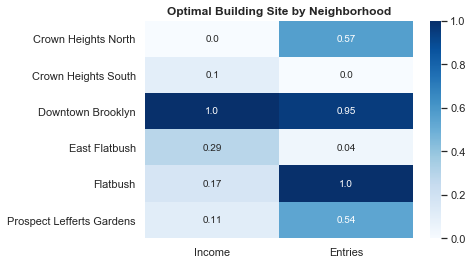

In [175]:
# Heat map of Income and Entries for Brooklyn Neighborhoods
sns.heatmap(df_norm_n_hood[["INCOME","ENTRIES"]].round(2), annot = True, cmap = "Blues", fmt = ".2")
plt.xticks(ticks=[0.5,1.5],labels = ["Income", "Entries"])
plt.title("Optimal Building Site by Neighborhood", weight = "bold")
plt.ylabel("",rotation=90, labelpad=0)
plt.savefig(path+"/img/Income_Entries_Neighborhood_Heatmap.png", dpi=300, bbox_inches='tight');

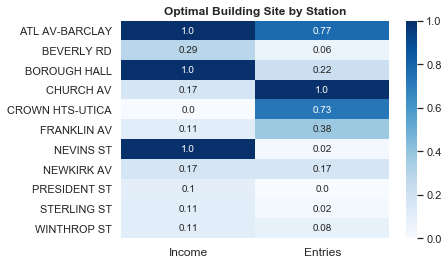

In [174]:
# Heat map of Income and Entries for Brooklyn Stations
sns.heatmap(df_norm_station[["INCOME","ENTRIES"]].round(2), annot = True, cmap = "Blues", fmt = ".2")
plt.title("Optimal Building Site by Station", weight="bold")
plt.xticks(ticks=[0.5,1.5],labels=["Income", "Entries"], fontsize=12)
plt.ylabel("")
plt.savefig(path+"/img/Income_Entries_Station_Heatmap.png", dpi=300, bbox_inches='tight');